# Churn Analysis (Data Science Project)

# 1. Import relevant libraries

In [197]:
# Step 1: Import relevant libraries---------------------------------------------------------

#Standard libraries for data analysis:----------------------

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm, skew


# sklearn modules for data preprocessing-------------------------------------

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


#sklearn modules for Model Selection--------------------------------------

from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


#sklearn modules for Model Evaluation & Improvement---------------------------

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score, GridSearchCV, ShuffleSplit, KFold




#Standard libraries for data visualization---------------------

import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib
%matplotlib inline
color = sns.color_palette()
import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import scatter_matrix



#Miscellaneous Utilitiy Libraries--------------------------------------


# 2. Set Up the current working directory & Import Dataset

In [198]:
# Step 2: Import the dataset
dataset = pd.read_csv('customer_churn_data.csv')

#Step 3: Read Dataset

# 3. Evaluate Data Structure

In [199]:
# Step 4: Evaluate data structure
dataset.shape

(7043, 21)

In [200]:
# Check Unique Value
df_columns = dataset.columns.tolist() # memasukan kolom pada 'dataset' kedalam sebuah list yaitu df_columns
for kolom in df_columns: # 'kolom' menandakan setiap bagian dari df_columns
    print(kolom, 'Unique values :', dataset[kolom].unique())

customerID Unique values : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender Unique values : ['Female' 'Male']
SeniorCitizen Unique values : [0 1]
Partner Unique values : ['Yes' 'No']
Dependents Unique values : ['No' 'Yes']
tenure Unique values : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService Unique values : ['No' 'Yes']
MultipleLines Unique values : ['No phone service' 'No' 'Yes']
InternetService Unique values : ['DSL' 'Fiber optic' 'No']
OnlineSecurity Unique values : ['No' 'Yes' 'No internet service']
OnlineBackup Unique values : ['Yes' 'No' 'No internet service']
DeviceProtection Unique values : ['No' 'Yes' 'No internet service']
TechSupport Unique values : ['No' 'Yes' 'No internet service']
StreamingTV Unique values : ['No' 'Yes' 'No internet service']


In [201]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [202]:
dataset.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [203]:
#Recheck Column Datatypes and Missing Values:

null_column = [columns for columns in dataset.columns if dataset.columns.isnull().sum()>1]
null_column

[]

In [204]:
data_null = dataset[dataset['tenure']==0]
data_null # data dengan tenure '0' Sus null values 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [205]:
# check percentage of missing values
print(round(data_null.TotalCharges.count()/dataset.TotalCharges.count(),3)*100,'%')

0.2 %


* Terdapat 11 baris dengan TotalCharges kosong
* Seluruh missing values memiliki tenure 0
* Missing values hanya 0.16% dari seluruh data -> treatment (delete baris ketika kita tidak punya informasi kenapa baris tersebut missing)

In [206]:
# Drop missing data
dataset = dataset.drop(dataset[dataset['tenure'] == 0].index)
dataset.shape


(7032, 21)

In [207]:
# change data type of Total charges -> float

dataset['TotalCharges'] = dataset['TotalCharges'].astype(float)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

# 4. Check Target Variable Distribution

# 5. Analisis prediktor kolom

In [208]:
#Step 5: Check Target Variable Distribution -----------------------------------------------

dataset["Churn"].value_counts(normalize=True)


Churn
No     0.734215
Yes    0.265785
Name: proportion, dtype: float64

What happen here?

* Jumlah value pada variabel target tidak seimbang lebih banyak 'no', dibandingkan dengan 'yes'
* Hal ini sering terjadi pada data churn, akan dilakukan handling data agar seimbang


## 5.1 Cust Info Analysis

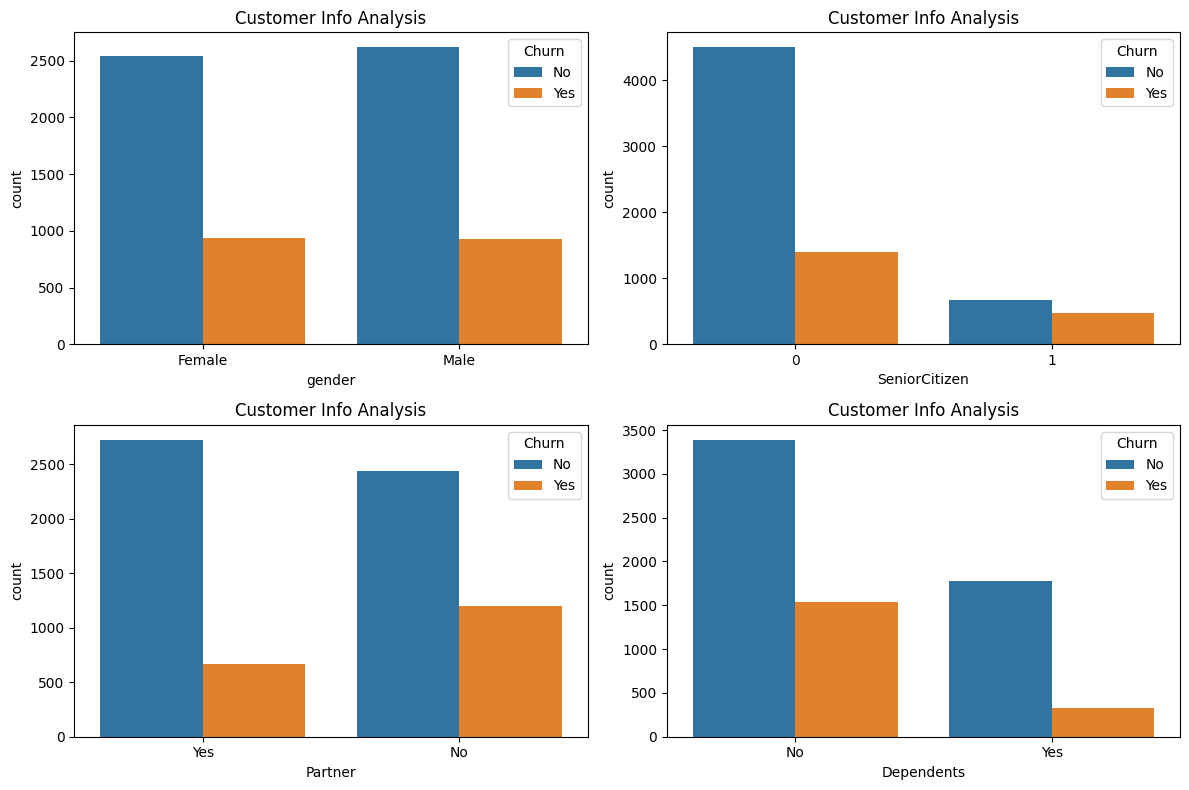

In [209]:
# create new var
df_check = dataset[['gender', 'SeniorCitizen', 'Partner', 'Dependents']]

# create figure
plt.figure(figsize=(12,8))

# create iteration each column
for i in range (df_check.shape[1]):
    plt.subplot(2,2,i+1)
    f = sns.countplot(data = df_check,
                     x = df_check.columns[i],
                     hue = dataset.Churn)
    plt.title('Customer Info Analysis')
plt.tight_layout()
plt.show()

Insight Dari Visualiasai diatas adalah
* pada kategori gender, dapat dilihat bahwa baik laki-laki ataupun perempuan memiliki tingkatan yang sama dalam kategori churn
* pada kategori Senior Citizen, kelompok yang bukan SeniorCitizen (0) memiliki tingkat churn yang lebih tinggi dibandingkan dengan kelompok SeniorCitizen (1)
* pada kategori partner, kelompok yang tidak memiliki partner memiliki tingkat churn yang lebih tinggi dibandingkan dengan kelompok yang memiliki partner
* pada kategori dependents, kelompok yang tidak mempunyai anak memiliki tingkat churn yang lebih tinggi dibandingkan dengan kelompok yang memiliki anak

## 5.2 Service Analysis

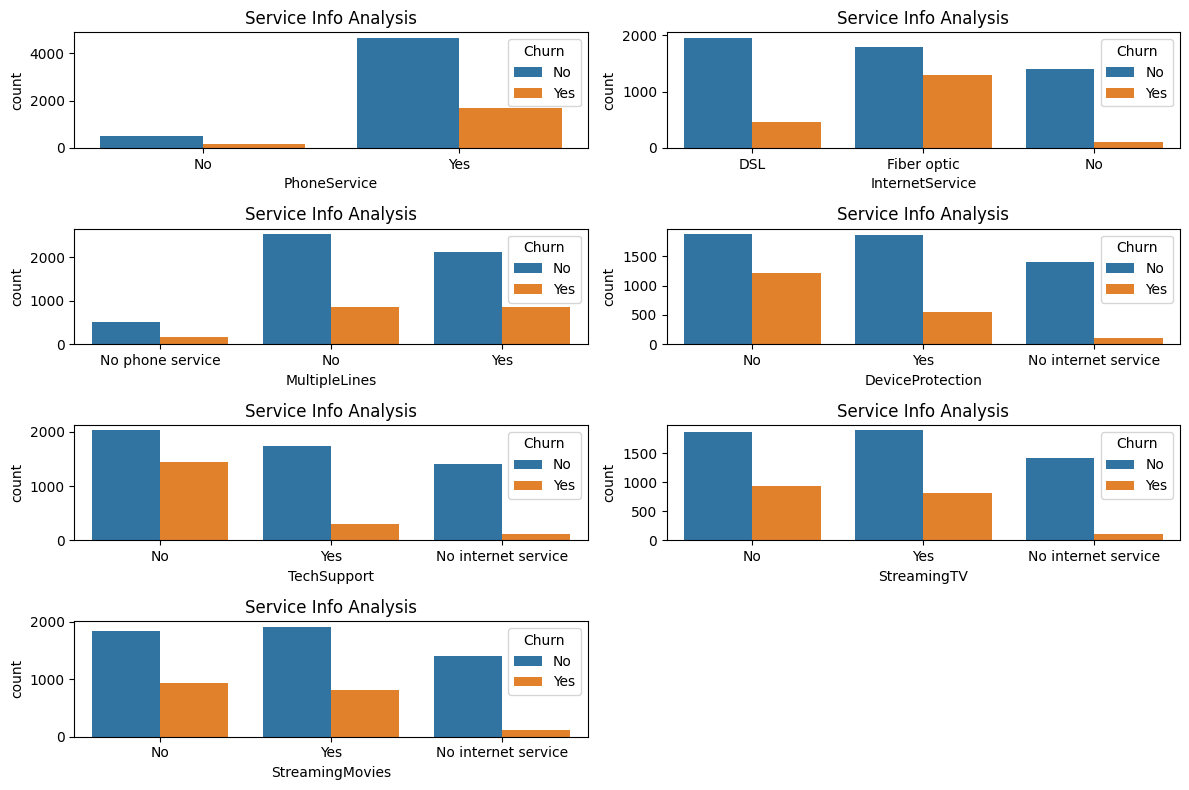

In [210]:
# new variable
df_check2 = dataset[['PhoneService','InternetService','MultipleLines','DeviceProtection','TechSupport', 'StreamingTV', 'StreamingMovies']]

# create figure of subplot 4x2

plt.figure(figsize=(12,8))

# iterate over each column
for i in range(df_check2.shape[1]):
    plt.subplot(4,2,i+1)
    f = sns.countplot(data = df_check2,
                     x = df_check2.columns[i],
                     hue= dataset['Churn']) # bisa pakai bagian dari dataset walaupun tidak masuk ke variabel baru
    f.set_title('Service Info Analysis')

plt.tight_layout()
plt.show()

Insight Dari Visualiasi diatas adalah
* Pada kategori phone service, kelompok yang mempunyai phone service memiliki tingkat churn yang lebih tinggi dibandingkan dengan yang tidak
* Pada kategori internet service, kelompok internet service dengan menggunakan fiber optic memiliki tingkat churn yang lebih tinggi dibandingkan dengan kelompok yang menggunakan DSL dan yang tidak menggunakan internet service
* Pada kategori Multiple Lines, kelompok yang mempunyai multiple line dan tidak mempunyai multiple line memiliki tingkat churn yang hampir mirip
* Pada kategori Device Protection, kelompok yang tidak ada device protection memiliki tingkat churn yang lebih tinggi dibandingkan dengan yang memiliki device protection dan tidak ada service internet
* Pada kategori Tech Support, kelompok yang tidak mempunyai tech support memiliki tingkat churn yang paling tinggi dibandingkan dengan yang memiliki tech support dan tidak memiliki internet service
* Pada kategori Streaming TV, kelompok yang tidak mempunyai streaming TV dan yang memiliki streaming TV memiliki tingkat churn yang hampir mirip
* Pada kategori Streaming Movies, kelompok yang tidak mempunyai streaming movies dan yang memiliki streaming movies memiliki tingkat churn yang hampir mirip

## 5.3 Payment Analysis

In [211]:
payment = dataset[['Contract', 'PaperlessBilling','PaymentMethod']].columns.tolist()

for x in (payment):
    print('Unique Values of',x,':',dataset[x].unique())

Unique Values of Contract : ['Month-to-month' 'One year' 'Two year']
Unique Values of PaperlessBilling : ['Yes' 'No']
Unique Values of PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


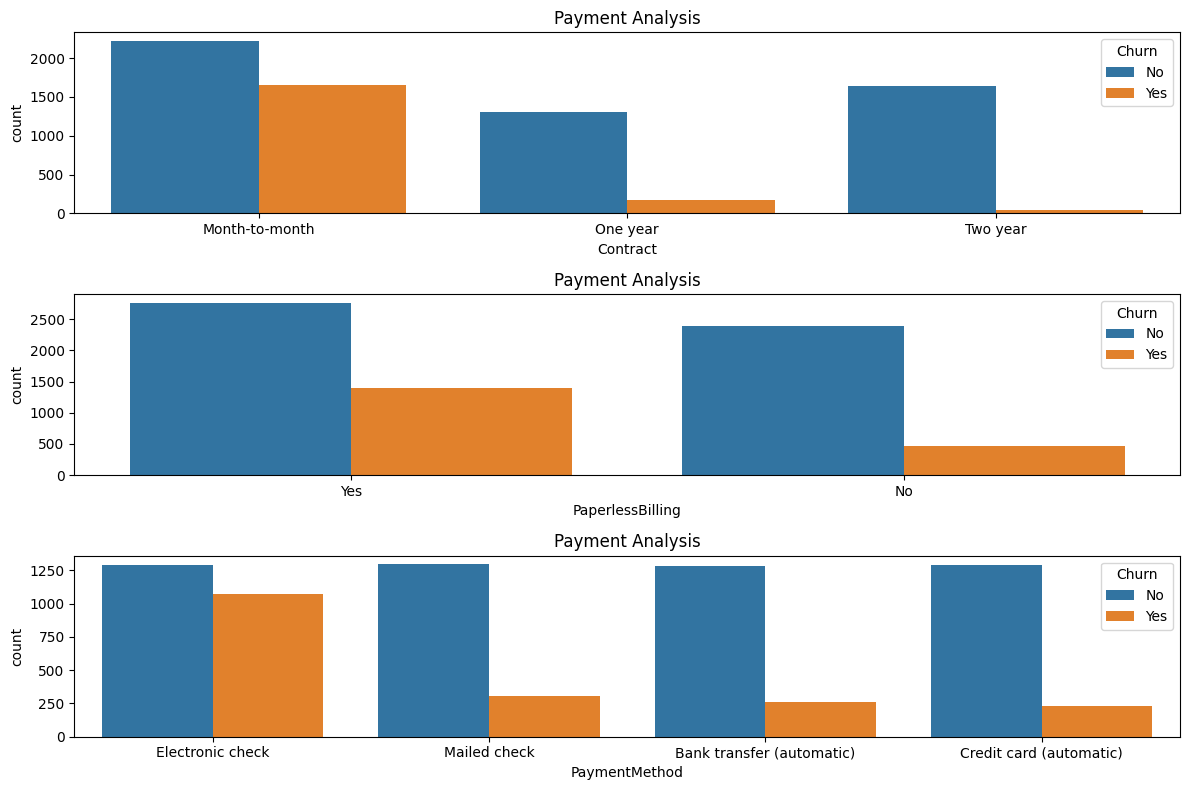

In [212]:
# New variable
df_check3 = dataset[['Contract', 'PaperlessBilling','PaymentMethod']]

# create figure
plt.figure(figsize=(12,8))

# create iteration each column - create subplot shape & position - create plot
for i in range(df_check3.shape[1]):
    plt.subplot(3,1,i+1)
    f = sns.countplot(data = df_check3,
                     x = df_check3.columns[i],
                     hue = dataset['Churn'])
    f.set_title('Payment Analysis')

plt.tight_layout()
plt.show()

Insight dari visualisasi diatas adalah :

* Pada kategori Contract, kelompok Month to Month contract memiliki tingkat churn yang paling tinggi dibandingkan dengan one year contract dan two year contract
* Pada kategori Paperless Billing, kelompok yang menggunakan paperless billing memiliki tingkat churn yang lebih tinggi dibandingkan dengan kelompok yang tidak menggunakan paperless billing
* Pada kategori Payment Method, kelompok electronic check merupakan kelompok dengan tingkat churn paling tinggi dibandingkan dengan kelompok lainnya

## 5.4 Check Outlier

In [213]:
numeric = dataset.select_dtypes(include=['float','int64'])

In [214]:
numeric.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65


In [215]:
numeric.drop(columns='SeniorCitizen', axis=1,inplace=True)
numeric.head()

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65


In [216]:
numeric.tenure.unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26, 39])

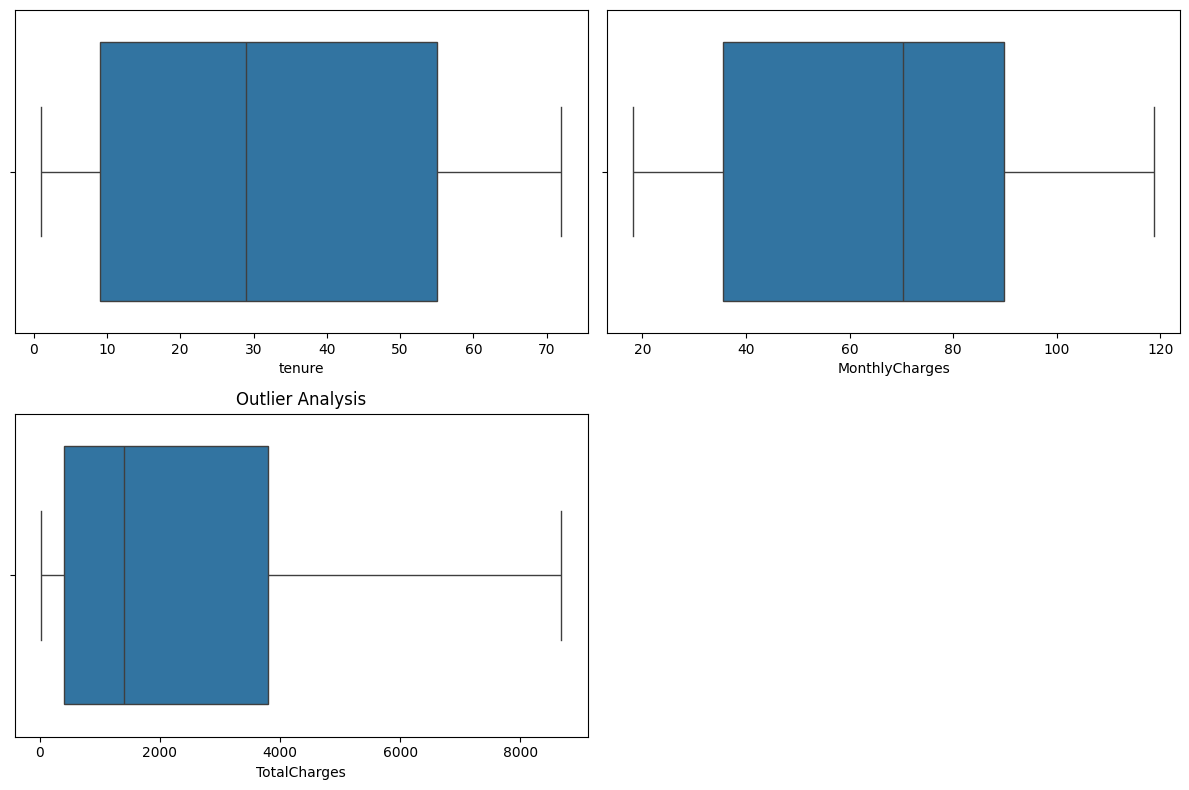

In [217]:
# check outlier with box plot

# New variable
check_out = numeric

# Create figure
plt.figure(figsize=(12,8))

# Create iteration
for i in range (check_out.shape[1]): # jadikan kolom sebagai range (gunakan.shape[1])
    plt.subplot(2,2,i+1) # buatkan posisi (berapa baris, berapa kolom, buat iterasi agar tidak bentrok (i+1))
    sns.boxplot(data=check_out, 
               x = check_out.columns[i])

plt.title('Outlier Analysis')
plt.tight_layout()
plt.show()

Berdasarkan hasil visualisasi diatas :

Tidak ditemukan outlier pada data

# 6. Prepare Dataset

## 6.1 Label Encoding

yang encode tahap 1 adalah :
* variabel dengan 2 opsi
* variabel dengan 3 opsi (2 opsi memiliki makna yang sama)

In [218]:
le = []
for col in dataset.columns[1:]:
    if dataset[col].dtype == 'object':
        if len(list(dataset[col].unique())) <=2:
            le.append(col)

In [219]:
le

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Churn']

In [220]:
le.append('MultipleLines')
le.append('PhoneService')
le.append('OnlineSecurity')
le.append('OnlineBackup')
le.append('DeviceProtection')
le.append('TechSupport')
le.append('StreamingTV')
le.append('StreamingMovies')

In [221]:
le

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Churn',
 'MultipleLines',
 'PhoneService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies']

In [222]:
le.remove('gender')

In [223]:
# buat function label_encoding

def label_encoding (df,features):
    for i in features:
        df[i] = df[i].map({'Yes' : 1, 'No' : 0, 'No phone service' : 0, 'No internet service' : 0})
    return df
df = label_encoding(dataset, le)
df['gender'] = dataset['gender'].map({'Female' : 0, 'Male' : 1})

In [224]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,NaN,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,NaN,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,NaN,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,NaN,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,NaN,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


* pada feature yang memiliki lebih dari 2 opsi, gunakan one hot encoding (agar lebih akurat)

## 6.2 One Hot Encoding

In [225]:
ohc = ['InternetService','Contract','PaymentMethod']
df_one_hot = pd.get_dummies(df, columns=ohc)

In [226]:
df_one_hot.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,NaN,0,0,1,0,0,0,0,1,29.85,29.85,0,True,False,False,True,False,False,False,False,True,False
1,5575-GNVDE,1,0,0,0,34,NaN,0,1,0,1,0,0,0,0,56.95,1889.50,0,True,False,False,False,True,False,False,False,False,True
2,3668-QPYBK,1,0,0,0,2,NaN,0,1,1,0,0,0,0,1,53.85,108.15,1,True,False,False,True,False,False,False,False,False,True
3,7795-CFOCW,1,0,0,0,45,NaN,0,1,0,1,1,0,0,0,42.30,1840.75,0,True,False,False,False,True,False,True,False,False,False
4,9237-HQITU,0,0,0,0,2,NaN,0,0,0,0,0,0,0,1,70.70,151.65,1,False,True,False,True,False,False,False,False,True,False


In [227]:
# drop Customer ID
df_one_hot = df_one_hot.drop(columns='customerID')

#drop PhoneService
df_one_hot = df_one_hot.drop(columns='PhoneService')

In [228]:
df_one_hot.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,1,0,0,0,0,1,29.85,29.85,0,True,False,False,True,False,False,False,False,True,False
1,1,0,0,0,34,0,1,0,1,0,0,0,0,56.95,1889.50,0,True,False,False,False,True,False,False,False,False,True
2,1,0,0,0,2,0,1,1,0,0,0,0,1,53.85,108.15,1,True,False,False,True,False,False,False,False,False,True
3,1,0,0,0,45,0,1,0,1,1,0,0,0,42.30,1840.75,0,True,False,False,False,True,False,True,False,False,False
4,0,0,0,0,2,0,0,0,0,0,0,0,1,70.70,151.65,1,False,True,False,True,False,False,False,False,True,False


# 7. Split Dataset into Dependent and Independent Variables

In [229]:
X = df_one_hot.drop(columns='Churn')
y = df_one_hot['Churn']

In [230]:
from collections import Counter

In [231]:
counter = Counter(y)
print(counter)

Counter({0: 5163, 1: 1869})


# 8. Generate training and test datasets of dependent and independent variables


In [232]:
X_train, X_test, y_train,y_test = train_test_split(X,y, stratify=y, test_size=0.2,random_state=0)
print('Before Sampling', Counter(y_train))

Before Sampling Counter({0: 4130, 1: 1495})


Dapat dilihat bahwa sebelum dilakukan SMOTE, perbandingan 0 dan 1 hasilnya masih sangat berbeda jauh

## 8.1 Handling data oversampling with SMOTE

In [233]:
# Import SMOTE
from imblearn.over_sampling import SMOTE


In [234]:
# Handling with SMOTE
smote = SMOTE(sampling_strategy='auto')
X_resampled, y_resampled = smote.fit_resample(X,y)

In [235]:
Counter(y_resampled)

Counter({0: 5163, 1: 5163})

In [236]:
# Split dataset with oversampling data
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_resampled,y_resampled, test_size=0.2, random_state=42)

In [237]:
# hasil sebelum & setelah handling

print('Before Sampling', Counter(y_train))
print('After Samplung', Counter(y_train2))

Before Sampling Counter({0: 4130, 1: 1495})
After Samplung Counter({1: 4134, 0: 4126})


# 9. Feature Scaling

In [238]:
scaler = StandardScaler()

# Scaled training data
X_train_scaled = scaler.fit_transform(X_train)
X_train2_scaled = scaler.fit_transform(X_train2)

# Scaled testing data
X_test_scaled = scaler.fit_transform(X_test)
X_test2_scaled = scaler.fit_transform(X_test2)

# Create new data frame after scaling
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_train2_scaled = pd.DataFrame(X_train2_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)
X_test2_scaled = pd.DataFrame(X_test2_scaled, columns=X.columns)

# 10. Model Selection & Evaluation

## 10.1 Model Evaluation

In [239]:
models = []

# LogisticRegression
models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state = 0,
                                                         class_weight='balanced')))
# Random Forest
models.append(('Random Forest', RandomForestClassifier(n_estimators=100, criterion='entropy',random_state=0)))

# 
models.append(('Decision Tree', DecisionTreeClassifier(max_depth=30,
                                                      criterion= 'gini',
                                                      max_features='sqrt',
                                                      min_samples_leaf=1,
                                                      min_samples_split=5,
                                                      splitter='random')))

## 10.2 Evaluating Model (Training-No SMOTE) Results 

In [240]:
# Evaluating Model (Training) Results:

acc_result = []
auc_result = []
names = []

col = ['Algorithm', 'ROC-AUC Mean','Accuracy Mean' ]
model_result = pd.DataFrame(columns=col)

from sklearn import model_selection
i=0
for name, model in models:
    kfold = model_selection.KFold(n_splits=5)
    cv_auc_result = model_selection.cross_val_score(model, X_train_scaled, y_train, cv=kfold, scoring='roc_auc')
    cv_acc_result = model_selection.cross_val_score(model, X_train_scaled, y_train, cv=kfold, scoring='accuracy')
    auc_result.append(cv_auc_result)
    acc_result.append(cv_acc_result)
    names.append(name)
    model_result.loc[i] = [name,round(cv_auc_result.mean()*100,2),
                           round(cv_acc_result.mean()*100,2)]
    i+=1
model_result.sort_values(by=['Accuracy Mean'], ascending=False) # ubah menjadi ROC-AOC mean jika ada outlier

# cek apakah ada outlier atau tidak, (Jika ada outlier maka patokan ROC -AOC, jika tidak ada bisa menggunakan accuracy)


,Algorithm,ROC-AUC Mean,Accuracy Mean
1,Random Forest,82.18,78.68
0,Logistic Regression,84.26,74.58
2,Decision Tree,70.80,73.76


## 10.3 Evaluating Model (Training) Results with SMOTE:

In [241]:
# Evaluating Model (Training) Results with SMOTE feature:

acc_result = []
auc_result = []
names = []

col = ['Algorithm', 'ROC-AUC Mean','Accuracy Mean' ]
model_result = pd.DataFrame(columns=col)

from sklearn import model_selection
i=0
for name, model in models:
    kfold = model_selection.KFold(n_splits=5)
    cv_auc_result = model_selection.cross_val_score(model, X_train2_scaled, y_train2, cv=kfold, scoring='roc_auc')
    cv_acc_result = model_selection.cross_val_score(model, X_train2_scaled, y_train2, cv=kfold, scoring='accuracy')
    auc_result.append(cv_auc_result)
    acc_result.append(cv_acc_result)
    names.append(name)
    model_result.loc[i] = [name,round(cv_auc_result.mean()*100,2),
                           round(cv_acc_result.mean()*100,2)]
    i+=1
model_result.sort_values(by=['Accuracy Mean'], ascending=False) # ubah menjadi ROC-AOC mean jika ada outlier

# cek apakah ada outlier atau tidak, (Jika ada outlier maka patokan ROC -AOC, jika tidak ada bisa menggunakan accuracy)


,Algorithm,ROC-AUC Mean,Accuracy Mean
1,Random Forest,92.97,84.77
0,Logistic Regression,92.77,83.93
2,Decision Tree,84.12,79.42


## 10.4 Evaluating Model (Testing) Results feature

In [242]:
# Evaluating Model (Testing) Results feature:

acc_result = []
auc_result = []
names = []

col = ['Algorithm', 'ROC-AUC Mean','Accuracy Mean' ]
model_result = pd.DataFrame(columns=col)

from sklearn import model_selection
i=0
for name, model in models:
    kfold = model_selection.KFold(n_splits=5)
    cv_auc_result = model_selection.cross_val_score(model, X_test_scaled, y_test, cv=kfold, scoring='roc_auc')
    cv_acc_result = model_selection.cross_val_score(model, X_test_scaled, y_test, cv=kfold, scoring='accuracy')
    auc_result.append(cv_auc_result)
    acc_result.append(cv_acc_result)
    names.append(name)
    model_result.loc[i] = [name,round(cv_auc_result.mean()*100,2),
                           round(cv_acc_result.mean()*100,2)]
    i+=1
model_result.sort_values(by=['Accuracy Mean'], ascending=False) # ubah menjadi ROC-AOC mean jika ada outlier

# cek apakah ada outlier atau tidak, (Jika ada outlier maka patokan ROC -AOC, jika tidak ada bisa menggunakan accuracy)


,Algorithm,ROC-AUC Mean,Accuracy Mean
1,Random Forest,80.97,77.47
0,Logistic Regression,84.78,74.48
2,Decision Tree,69.06,73.92


## 10.5 Evaluating Model (Testing) Results with SMOTE feature:

In [243]:
# Evaluating Model (Testing) Results with SMOTE feature:

acc_result = []
auc_result = []
names = []

col = ['Algorithm', 'ROC-AUC Mean','Accuracy Mean' ]
model_result = pd.DataFrame(columns=col)

from sklearn import model_selection
i=0
for name, model in models:
    kfold = model_selection.KFold(n_splits=5)
    cv_auc_result = model_selection.cross_val_score(model, X_test2_scaled, y_test2, cv=kfold, scoring='roc_auc')
    cv_acc_result = model_selection.cross_val_score(model, X_test2_scaled, y_test2, cv=kfold, scoring='accuracy')
    auc_result.append(cv_auc_result)
    acc_result.append(cv_acc_result)
    names.append(name)
    model_result.loc[i] = [name,round(cv_auc_result.mean()*100,2),
                           round(cv_acc_result.mean()*100,2)]
    i+=1
model_result.sort_values(by=['Accuracy Mean'], ascending=False) # ubah menjadi ROC-AOC mean jika ada outlier

# cek apakah ada outlier atau tidak, (Jika ada outlier maka patokan ROC -AOC, jika tidak ada bisa menggunakan accuracy)


,Algorithm,ROC-AUC Mean,Accuracy Mean
0,Logistic Regression,91.68,83.35
1,Random Forest,89.96,82.19
2,Decision Tree,80.42,77.06


# 11. Compare Hasil SMOTE & Tidak

* Hasil evaluasi yang dilihat adalah accuracy mean karena dalam data tidak ada outlier berdasarkan hasil visualisasi pada 5.4

Pada data training, data yang dilakukan SMOTE memiliki akurasi yang lebih tinggi pada 3 model yaitu (Random forest, Decision Tree, dan Logistic Regression)

Pada data testing, data yang dilakukan SMOTE memiliki akurasi yang lebih tinggi pada 3 model yaitu (Random forest, Decision Tree, dan Logistic Regression)

# 12. Apakah Hasil dengan SMOTE mengalami penurunan akurasi? - Model mana yang paling terlihat penurunan atau kenaikan akurasinya

Hasil dengan SMOTE tidak mengalami penurunan, yang terjadi adalah kenaikan persentase. Model dengan peningkatan tertinggi setelah data dilakukan SMOTE adalah Logistic Regression. Sedangkan untuk model dengan peningkatan terendah adalah Decision Tree

# 13. Model mana yang dipakai?

Model yang akan dipakai adalah Random Forest. Berdasarkan data model random forest memiliki tingkat akurasi diurutan pertama diantara 3 model, hanya 1x berada diperikat kedua yaitu pada pengujian dengan data testing dan dilakukan SMOTE